# Step-1:Business problem understanding

**Predict Survival**

# step-2:Data Understanding

 **Load Data & Understand every variable**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\python divers\test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.shape

(418, 11)

In [4]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


***Exploratory Data Analysis***

In [7]:
continous=["Fare","Age"]
Discrete_count=["Pclass","SibSp","Parch"]
Discrete_categorical=["Sex","Embarked"]

In [8]:
df[continous].describe()

,Fare,Age
count,417.000000,332.000000
mean,35.627188,30.272590
std,55.907576,14.181209
min,0.000000,0.170000
25%,7.895800,21.000000
50%,14.454200,27.000000
75%,31.500000,39.000000
max,512.329200,76.000000


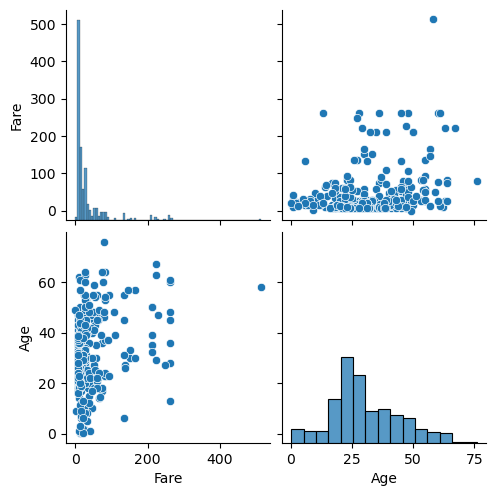

In [9]:
sns.pairplot(df[continous])
plt.show()

In [10]:
df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [11]:
df[continous].skew()

Fare    3.687213
Age     0.457361
dtype: float64

In [12]:
df["Fare"]=df["Fare"]**(1/5)
df["Fare"].skew()

0.8477141187713024

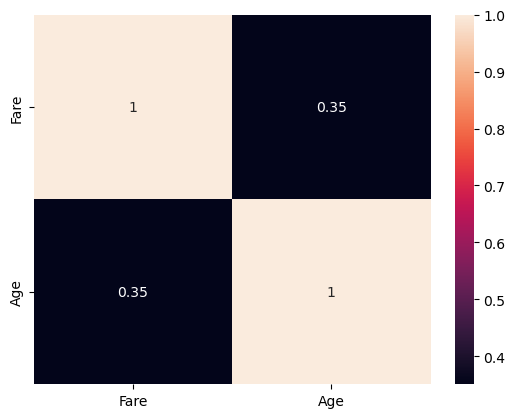

In [13]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

In [14]:
df[Discrete_count].describe()

,Pclass,SibSp,Parch
count,418.000000,418.000000,418.000000
mean,2.265550,0.447368,0.392344
std,0.841838,0.896760,0.981429
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,8.000000,9.000000


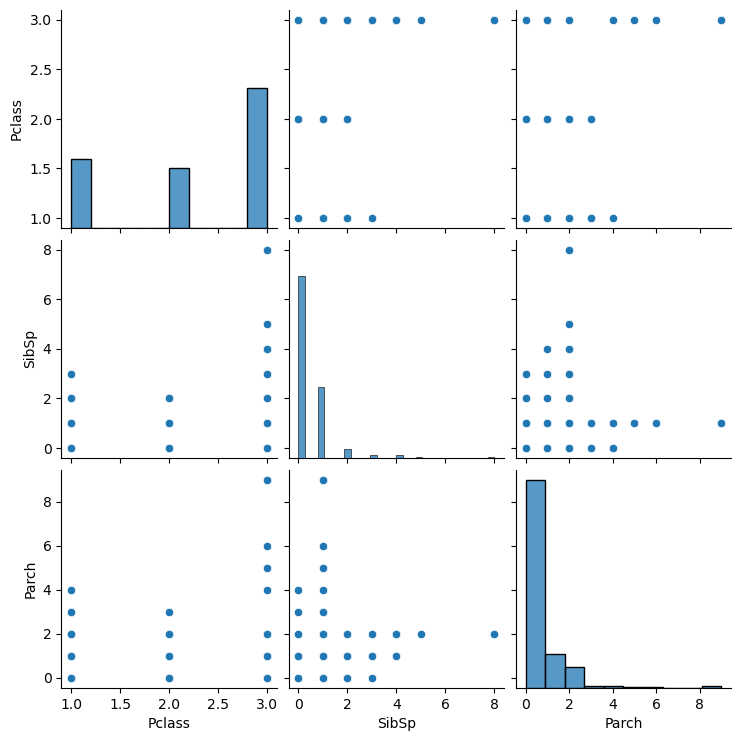

In [15]:
sns.pairplot(df[Discrete_count])
plt.show()

In [16]:
df[Discrete_categorical].describe()

,Sex,Embarked
count,418,418
unique,2,3
top,male,S
freq,266,270


In [17]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [18]:
df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [19]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [20]:
df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

**Check for outliers**

<AxesSubplot:>

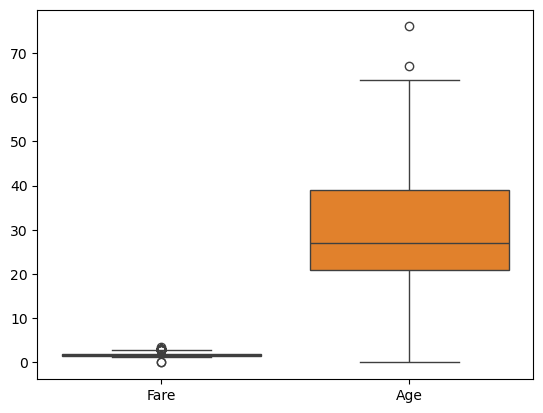

In [21]:
sns.boxplot(df[continous])

# Step-3: Data Preprocessing

**Data Cleaning**

In [22]:
df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

**Replace**

In [23]:
df.duplicated().sum()

38

In [24]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Age"]

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [25]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"]

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [26]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

**Outliers Treatment**

In [27]:
#Retrain the Outliers

# Data Wrangling

In [38]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,1.509188,1
1,3,0,47.0,1,0,1.475773,2
2,2,1,62.0,0,0,1.574861,1
3,3,1,27.0,0,0,1.540028,2
4,3,0,22.0,1,1,1.651554,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,1.517606,2
414,1,0,39.0,0,0,2.555086,0
415,3,1,38.5,0,0,1.486167,2
416,3,1,27.0,0,0,1.517606,2


**Encoding**

In [39]:
df["Sex"]=df["Sex"].replace({"female":0,"male":1})
df["Sex"]

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [40]:
df["Embarked"]=df["Embarked"].replace({"C":0,"Q":1,"S":2})
df["Embarked"]

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

In [41]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,1.509188,1
1,3,0,47.0,1,0,1.475773,2
2,2,1,62.0,0,0,1.574861,1
3,3,1,27.0,0,0,1.540028,2
4,3,0,22.0,1,1,1.651554,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,1.517606,2
414,1,0,39.0,0,0,2.555086,0
415,3,1,38.5,0,0,1.486167,2
416,3,1,27.0,0,0,1.517606,2


In [47]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,1.509188,1
1,3,0,47.0,1,0,1.475773,2
2,2,1,62.0,0,0,1.574861,1
3,3,1,27.0,0,0,1.540028,2
4,3,0,22.0,1,1,1.651554,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,1.517606,2
414,1,0,39.0,0,0,2.555086,0
415,3,1,38.5,0,0,1.486167,2
416,3,1,27.0,0,0,1.517606,2


In [59]:
df.to_excel("cleaned test output.xlsx")

In [60]:
pwd

'C:\\Users\\Aravind\\Titanic ML Project'